<a href="https://colab.research.google.com/github/RajaNaufal011/Certainty-Factor-LogicFuzzy-/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.1 MB/s eta 0:00:00


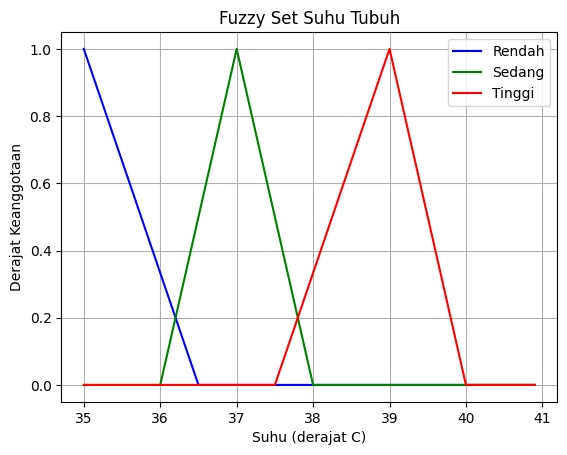

Derajat keanggotaan suhu 35.2 derajat C:
- Rendah: 0.87
- Sedang: 0.00
- Tinggi: 0.00


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

suhu = np.arange(35, 41, 0.1)

rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])

plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

input_suhu = 35.2
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

print(f"Derajat keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah: {suhu_rendah:.2f}")
print(f"- Sedang: {suhu_sedang:.2f}")
print(f"- Tinggi: {suhu_tinggi:.2f}")

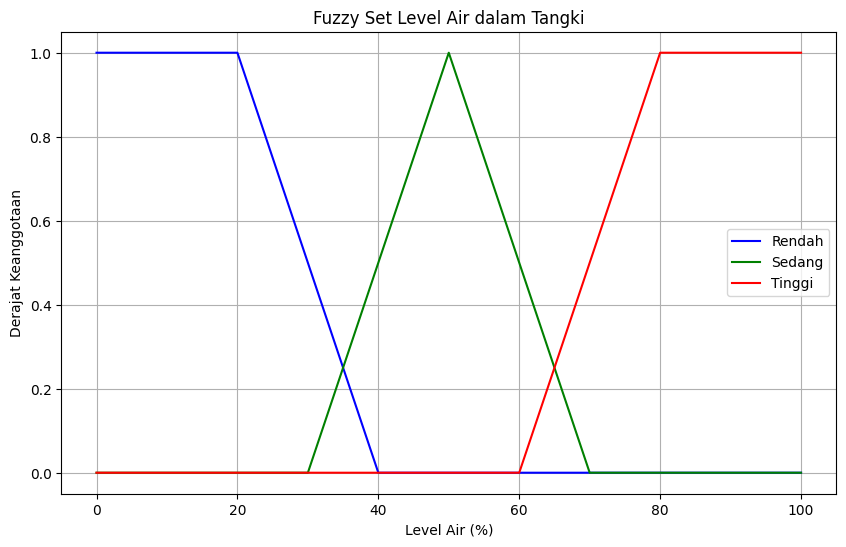

Derajat keanggotaan level air 25%:
- Rendah: 0.75
- Sedang: 0.00
- Tinggi: 0.00


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

level = np.arange(0, 101, 1)

rendah = fuzz.trapmf(level, [0, 0, 20, 40])
sedang = fuzz.trimf(level, [30, 50, 70])
tinggi = fuzz.trapmf(level, [60, 80, 100, 100])

plt.figure(figsize=(10, 6))
plt.plot(level, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(level, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(level, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Level Air dalam Tangki')
plt.xlabel('Level Air (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

input_level = 25
level_rendah = fuzz.interp_membership(level, rendah, input_level)
level_sedang = fuzz.interp_membership(level, sedang, input_level)
level_tinggi = fuzz.interp_membership(level, tinggi, input_level)

print(f"Derajat keanggotaan level air {input_level}%:")
print(f"- Rendah: {level_rendah:.2f}")
print(f"- Sedang: {level_sedang:.2f}")
print(f"- Tinggi: {level_tinggi:.2f}")

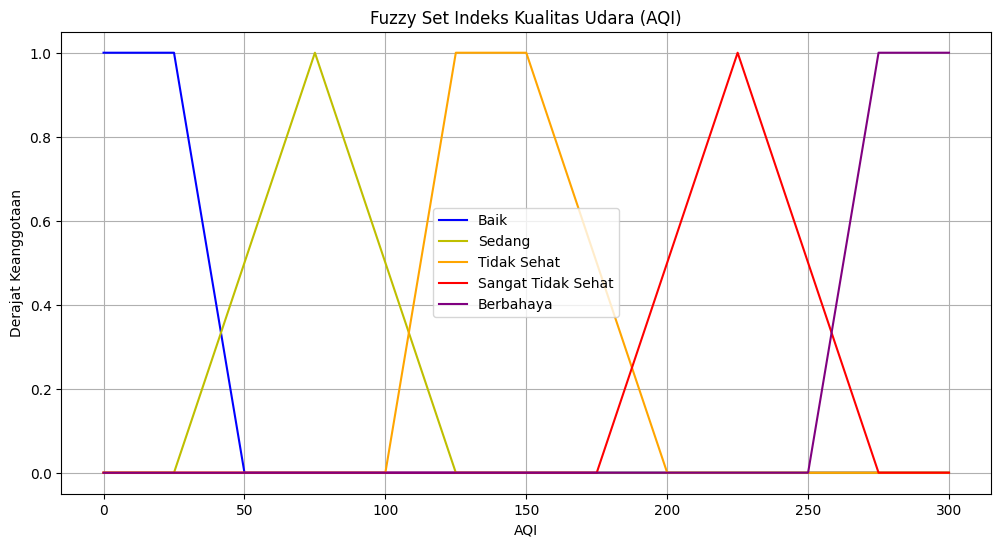

Derajat keanggotaan AQI 120:
• Baik : 0.00
• Sedang : 0.10
• Tidak Sehat : 0.80
• Sangat Tidak Sehat : 0.00
• Berbahaya : 0.00


In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse
aqi = np.arange(0, 301, 1)

# Fuzzy sets for Air Quality Index
baik = fuzz.trapmf(aqi, [0, 0, 25, 50])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trapmf(aqi, [100, 125, 150, 200])  # sudah diperbaiki: harus 4 elemen
sangat_tidak_sehat = fuzz.trimf(aqi, [175, 225, 275])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

# Visualize fuzzy sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'b', linewidth=1.5, label='Baik')
plt.plot(aqi, sedang, 'y', linewidth=1.5, label='Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label='Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat, 'r', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label='Berbahaya')
plt.title('Fuzzy Set Indeks Kualitas Udara (AQI)')
plt.xlabel('AQI')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_aqi = 120
aqi_baik = fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)

print(f"Derajat keanggotaan AQI {input_aqi}:")
print(f"• Baik : {aqi_baik:.2f}")
print(f"• Sedang : {aqi_sedang:.2f}")
print(f"• Tidak Sehat : {aqi_tidak_sehat:.2f}")
print(f"• Sangat Tidak Sehat : {aqi_sangat_tidak_sehat:.2f}")
print(f"• Berbahaya : {aqi_berbahaya:.2f}")

Kecepatan kipas AC (suhu 22°C, kelembaban 80%, aktivitas 8): 33.89


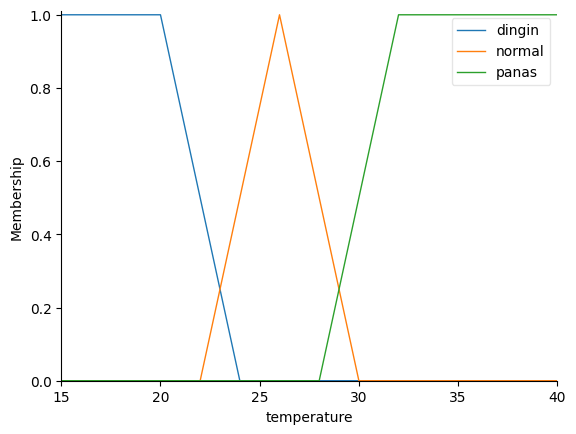

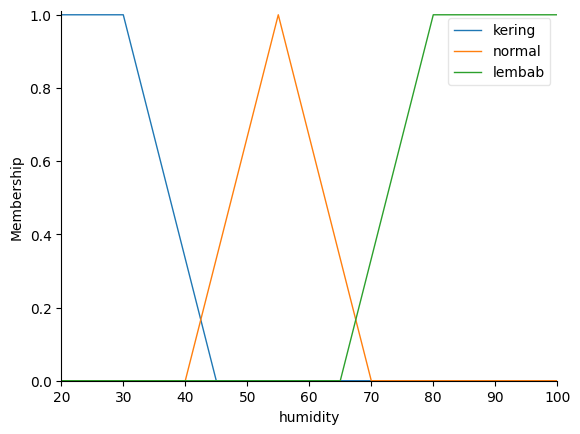

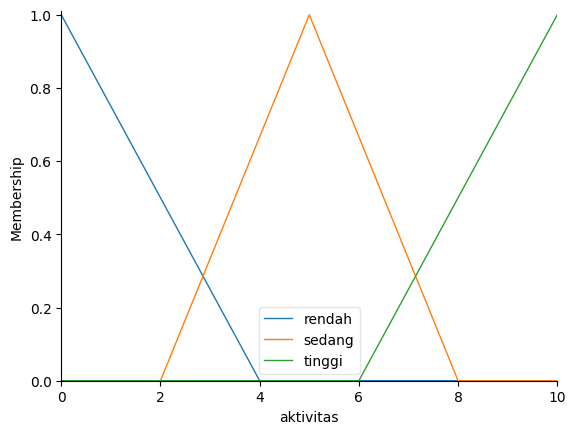

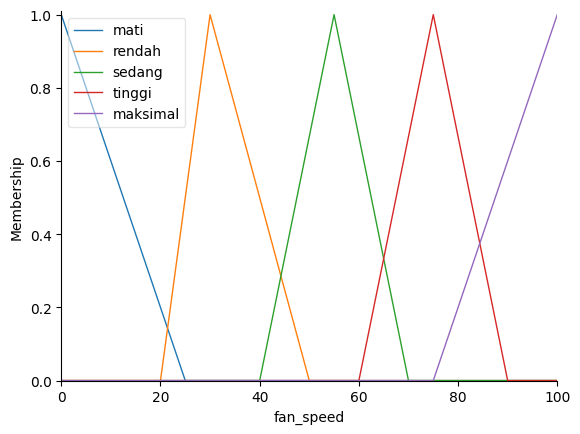

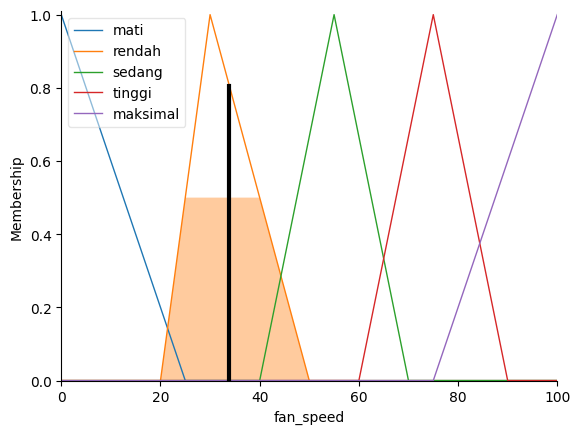

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')
aktivitas = ctrl.Antecedent(np.arange(0, 11, 1), 'aktivitas')  # variabel baru

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['normal'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [40, 55, 70])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [65, 80, 100, 100])

# Membership functions for aktivitas
aktivitas['rendah'] = fuzz.trimf(aktivitas.universe, [0, 0, 4])
aktivitas['sedang'] = fuzz.trimf(aktivitas.universe, [2, 5, 8])
aktivitas['tinggi'] = fuzz.trimf(aktivitas.universe, [6, 10, 10])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [20, 30, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [40, 55, 70])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [60, 75, 90])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualisasi (opsional)
temperature.view()
humidity.view()
aktivitas.view()
fan_speed.view()

# Rules lama
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['normal'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['normal'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['normal'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])

# Rules baru (dengan aktivitas)
rule10 = ctrl.Rule(aktivitas['tinggi'] & temperature['normal'], fan_speed['tinggi'])
rule11 = ctrl.Rule(aktivitas['sedang'] & humidity['lembab'], fan_speed['sedang'])
rule12 = ctrl.Rule(aktivitas['rendah'] & temperature['dingin'], fan_speed['mati'])

# Create control system
ac_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12
])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Masukkan input
ac.input['temperature'] = 22
ac.input['humidity'] = 80
ac.input['aktivitas'] = 8  # aktivitas tinggi

# Proses
ac.compute()

# Output
print(f"Kecepatan kipas AC (suhu 22°C, kelembaban 80%, aktivitas 8): {ac.output['fan_speed']:.2f}")
fan_speed.view(sim=ac)
plt.show()


## Fuzzy Logic Analysis

### Perubahan Suhu Menjadi 22°C
- Ketika input `temperature` diubah menjadi **22°C**, nilai suhu berada pada **daerah batas antara "dingin" dan "normal"**.
- Artinya, suhu 22°C memiliki **derajat keanggotaan (membership degree)** pada **dua himpunan fuzzy**, yaitu:
  - "dingin" → cukup tinggi
  - "normal" → mulai memiliki nilai
- Karena suhu mendekati sisi bawah dari "normal", maka aturan yang melibatkan `temperature['dingin']` dan `temperature['normal']` akan **aktif sebagian** (partial activation).
- Akibatnya, kecepatan kipas tidak langsung tinggi atau rendah sepenuhnya, tapi berada **di antara** — tergantung juga dari `humidity` dan `aktivitas`.

---

### Mengapa Suhu 28°C Bisa Masuk ke Dua Kategori?
- Suhu **28°C** berada **di tengah-tengah** antara kategori "normal" dan "panas".
- Pada metode fuzzy, satu nilai input bisa memiliki **nilai keanggotaan lebih dari satu**.
- Untuk 28°C:
  - Bisa punya **nilai keanggotaan (misal 0.4)** di `temperature['normal']`
  - Dan nilai **keanggotaan lain (misal 0.6)** di `temperature['panas']`
- Ini yang memungkinkan **dua aturan fuzzy aktif bersamaan**, dan hasil akhirnya adalah kombinasi (agregasi) dari keduanya.
- Mekanisme ini disebut sebagai **fuzzy overlap** dan menjadi dasar kelebihan logika fuzzy dibanding logika biner.

---

### Aturan Baru Berdasarkan Variabel Aktivitas
- Penambahan variabel `aktivitas` memberikan sistem **kemampuan adaptif yang lebih baik** terhadap kondisi nyata.
- Contoh aturan baru yang diterapkan:
  - `aktivitas['tinggi']` dan `temperature['normal']` → `fan_speed['tinggi']`
  - `aktivitas['sedang']` dan `humidity['lembab']` → `fan_speed['sedang']`
  - `aktivitas['rendah']` dan `temperature['dingin']` → `fan_speed['mati']`
- Dengan aturan ini, meskipun suhu tidak terlalu tinggi, jika aktivitas fisik tinggi maka kecepatan kipas bisa dinaikkan untuk kenyamanan.

---

### Kesimpulan
- Sistem fuzzy bekerja dengan **kombinasi input dan aturan berbobot**.
- Perubahan nilai satu input bisa berdampak besar jika berada pada area transisi antar himpunan fuzzy.
- Dengan penambahan variabel `aktivitas`, sistem menjadi lebih fleksibel dan realistis dalam pengambilan keputusan.

